# Partie 3 : Presentation générale des modèles predictifs de Machine Learning

## Exploration générale des données

### Importation des librairies et du Dataset NETTOYÉ

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,TA_ChestPain,ATA_ChestPain,NAP_ChestPain,ASY_ChestPain,Normal_RestingECG,ST_RestingECG,LVH_RestingECG,Up_ST_Slope,Flat_ST_Slope,Down_ST_Slope,HeartDisease
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0,0
1,49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0,1
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1,0,0,0
3,48,1,138,214,0,108,1,1.5,0,0,0,1,1,0,0,0,1,0,1
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1,0,0,0


### Visualisation des données et des corrélations

In [103]:

copie = data.copy()
copie['HeartDisease'] = copie['HeartDisease'].replace({1: 'Malade', 0: 'Sain'})
copie['HeartDisease'].value_counts()

HeartDisease
Malade    507
Sain      410
Name: count, dtype: int64

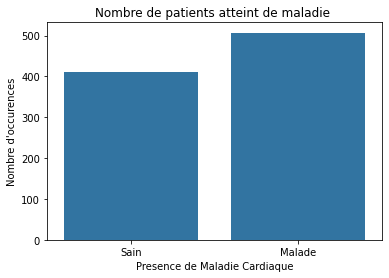

In [104]:
sns.countplot(x='HeartDisease', data=copie)
plt.title('Nombre de patients atteint de maladie ')
plt.xlabel('Presence de Maladie Cardiaque')
plt.ylabel("Nombre d'occurences")
plt.show()

### Correlation entre la presence de maladie cardiaque et les autres variables

#### La frequence Cardiaque Maximale

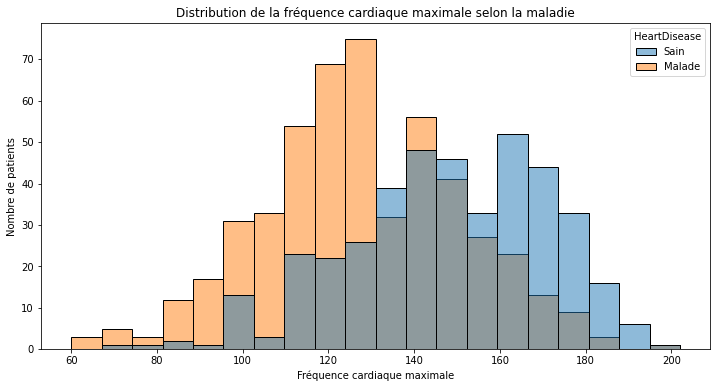

In [105]:
plt.figure(figsize=(12, 6))
sns.histplot(data=copie, x='MaxHR', hue='HeartDisease', multiple="layer", alpha=0.5)
plt.title('Distribution de la fréquence cardiaque maximale selon la maladie')
plt.xlabel('Fréquence cardiaque maximale')
plt.ylabel('Nombre de patients')
plt.show()

Remarque :  D'apres le graphique ci-dessus, on peut voit que entre 100 et 150 bpm de frequence cardiaque maximale environ, la probabilité d'avoir une maladie cardiaque est plus élevée. Mais il est important de noter que la frequence cardiaque maximale est une variable continue et non une variable catégorielle. On ne connait pas si le patient tester a realiser un effort physique avant de faire le test. Il est donc important de prendre en compte cette variable dans le modèle predictif pour plus de transparence.

#### Le Sexe

<Figure size 720x432 with 0 Axes>

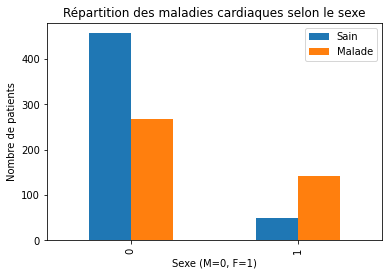

In [106]:
plt.figure(figsize=(10, 6))
pd.crosstab(copie['Sex'], copie['HeartDisease']).plot(kind='bar')
plt.title('Répartition des maladies cardiaques selon le sexe')
plt.xlabel('Sexe (M=0, F=1)')
plt.ylabel('Nombre de patients')
plt.legend(['Sain', 'Malade'])
plt.show()

In [107]:
nbr_femme = copie['Sex'].value_counts()[1]
nbr_homme = copie['Sex'].value_counts()[0]

nbr_femme_mal = 0
nbr_homme_mal = 0
for index, personne in copie.iterrows():
    if personne["HeartDisease"] == "Malade":
        if personne['Sex'] == 1:
            nbr_femme_mal += 1
        else:
            nbr_homme_mal += 1
    
print(f"Nombre de femmes : {nbr_femme}")
print(f"Nombre de femmes malades : {nbr_femme_mal}")
print(f"Pourcentage de femmes malades : {nbr_femme_mal/nbr_femme*100}%")
print("\n")
print(f"Nombre d'hommes : {nbr_homme}")
print(f"Nombre d'hommes malades : {nbr_homme_mal}")
print(f"Pourcentage d'hommes malades : {nbr_homme_mal/nbr_homme*100}%")

Nombre de femmes : 193
Nombre de femmes malades : 50
Pourcentage de femmes malades : 25.906735751295333%


Nombre d'hommes : 724
Nombre d'hommes malades : 457
Pourcentage d'hommes malades : 63.12154696132597%


Remarque : D'apres le graphique ci-dessus, malgré le fait que le sexe n'est pas une variable continue et qu'il y'ai plus d'hommes que de femmes dans le dataset, on peut voir que la probabilité d'avoir une maladie cardiaque est plus élevée chez les hommes que chez les femmes.

#### L'âge

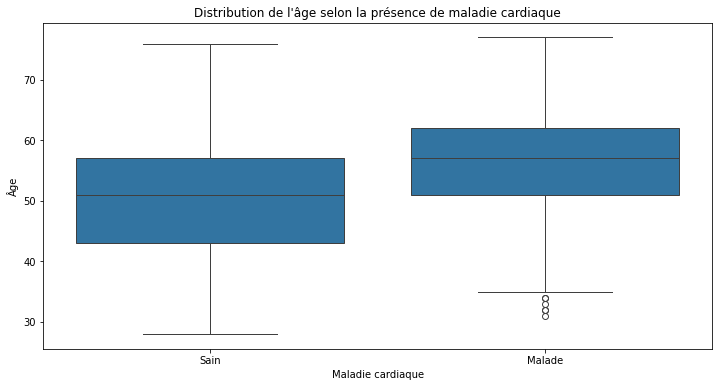

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='Age', data=copie)
plt.title('Distribution de l\'âge selon la présence de maladie cardiaque')
plt.xlabel('Maladie cardiaque')
plt.ylabel('Âge')
plt.show()

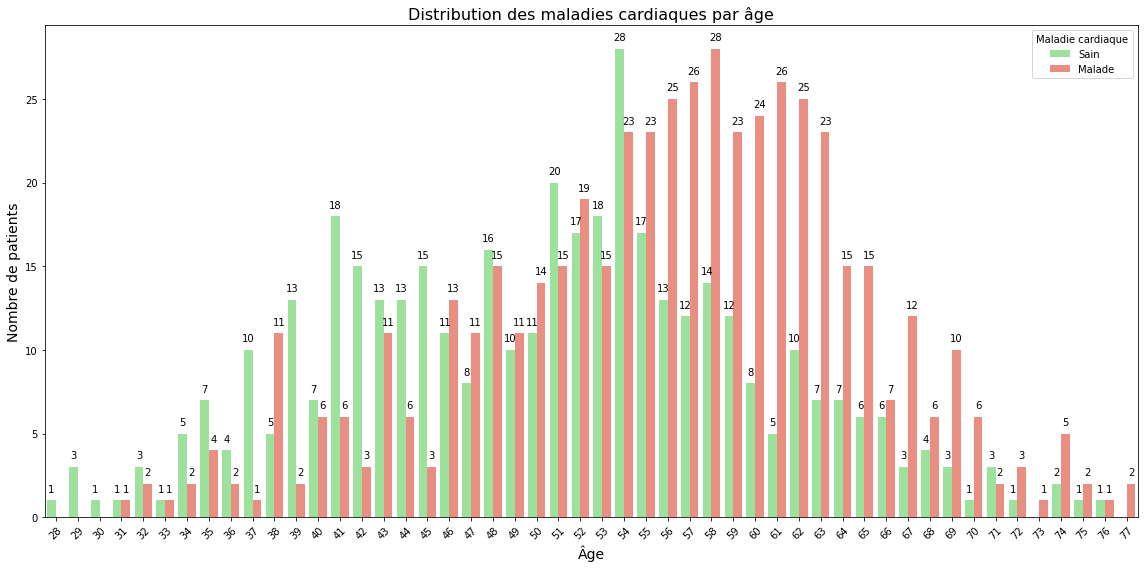

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.figure(figsize=(16, 8))


age_min = int(copie['Age'].min())
age_max = int(copie['Age'].max()) + 1
bins = np.arange(age_min, age_max + 1, 1)


ax = sns.countplot(data=copie, x='Age', hue='HeartDisease', palette=['lightgreen', 'salmon'])


plt.title('Distribution des maladies cardiaques par âge', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Nombre de patients', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Maladie cardiaque')


for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(p.get_x() + p.get_width()/2., height + 0.5,
                int(height), ha="center")

plt.tight_layout()
plt.show()




<Figure size 1152x576 with 0 Axes>

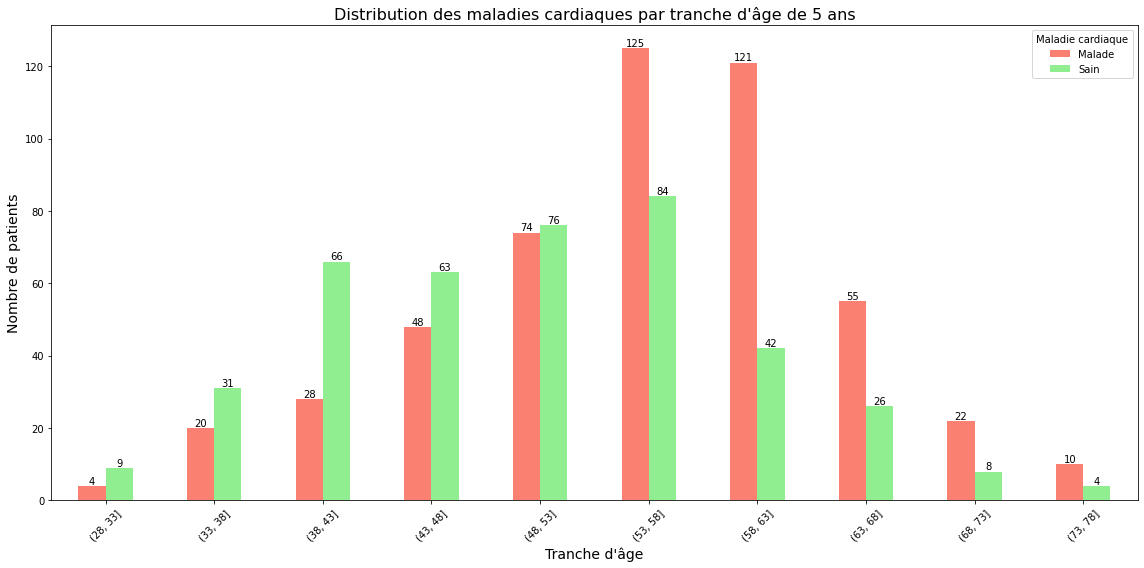

In [110]:
plt.figure(figsize=(16, 8))


copie['AgeBin'] = pd.cut(copie['Age'], bins=range(age_min, age_max + 5, 5))


age_disease = pd.crosstab(copie['AgeBin'], copie['HeartDisease'])

# Tracer le graphique
age_disease.plot(kind='bar', stacked=False, figsize=(16, 8), color=['salmon', 'lightgreen'])
plt.title('Distribution des maladies cardiaques par tranche d\'âge de 5 ans', fontsize=16)
plt.xlabel('Tranche d\'âge', fontsize=14)
plt.ylabel('Nombre de patients', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Maladie cardiaque')
plt.tight_layout()

# Ajouter les valeurs sur les barres
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

Remarque : D'apres les graphiques ci-dessus, on peut voir que la probabilité d'avoir une maladie cardiaque augmente avec l'âge. Plus precisement, jusque 53 ans on a plus de patient sains que de patients malades. Mais à partir de la tranche d'age 53-58 ans, on a plus de patients malades que de patients sains.

### Matrice de corrélation

<Axes: >

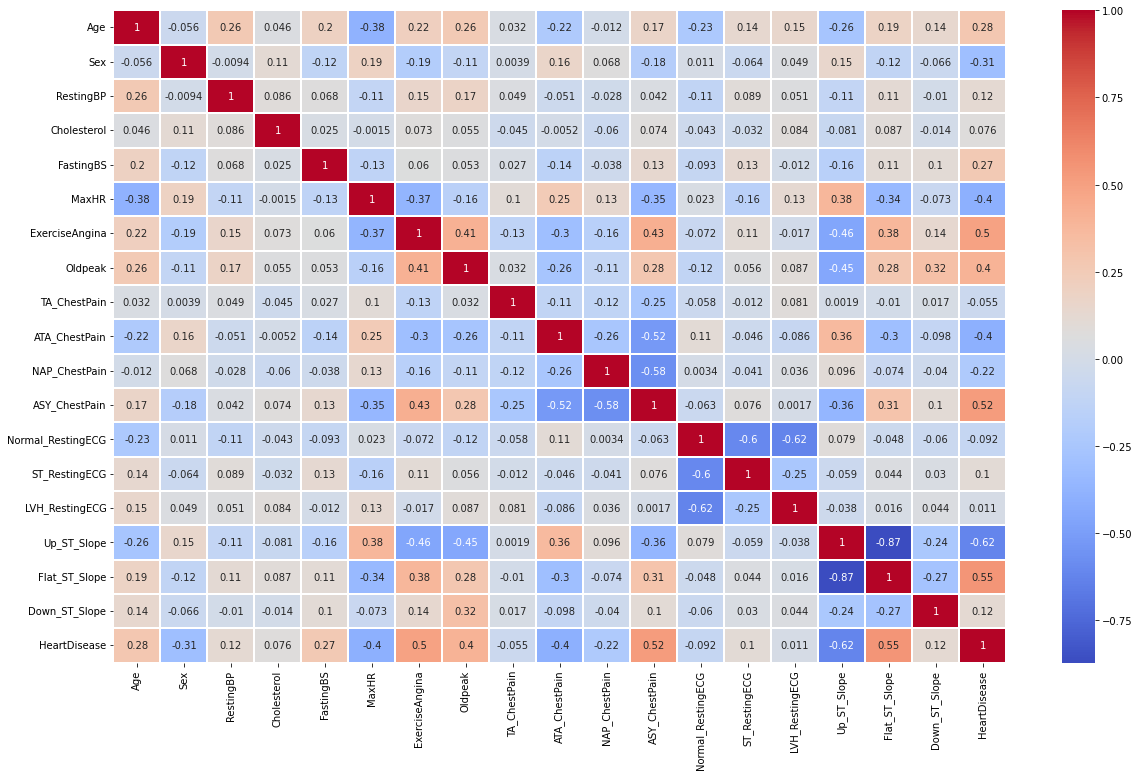

In [111]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.1)

Remarque : D'apres la matrice de corrélation ci-dessus, on peut voir que les variables les plus corrélées positivement avec la variable cible (presence de maladie cardiaque) sont ExerciseAngina (la presence d'angine du à l'exercice), ASY_ChestPain (le type de douleur throracique asymptomatique) et Flat_ST_Slope(Pente su segment ST du à l'effort plat). Les variables les plus corrélées négativement avec la variable cible sont MaxHR (Frequence cardiaque maximale atteinte) ATA_ChestPain (le type de douleur throracique atypique) et Up_ST_Slope (Pente su segment ST du à l'effort montant).